## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [74]:
# Your code here - remember to use markdown cells for comments as well!

###  Import the pandas and Matplotlib library 
* The pandas library   will be used in analysing and cleaning the data set we have.
* The Matlotlib library will be used in visualizing the data

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt

we read the data in the csv file 
create a Series called aviation data to hold the data in  a data frame
Then check what we are working with  

In [76]:
aviation_data = pd.read_csv("data/Aviation_Data.csv" , low_memory=False)

aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


#Raw data summary

From the avaiation_data series we see that the data has 90,348 rows and has 31 columns 

Pandas detected that:

Some rows in those columns are numbers

Others are strings / missing values

It couldn’t safely guess a single dtype while loading in chunks


instead we added the low memory = false as it :
   : Removes the warning
   : Lets pandas infer dtypes correctly
   :Ideal for plotting & exploration

CHECKING THE DATA SET IFORMATION 

- To get a clear glimpse of what we are woking  on 

use the .info() function for this 

In [77]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [78]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Check what values are missing in the whole data frame , this helps us decide which data we will remove , which we will fill with values 

In [79]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


#Check for duplicate values

In [80]:
aviation_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
90343    False
90344    False
90345    False
90346    False
90347    False
Length: 90348, dtype: bool

In [81]:
aviation_data.drop_duplicates( inplace=True)

aviation_data.duplicated().sum()

np.int64(0)

In [82]:
aviation_data.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38826
Airport.Name              36254
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1451
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7165
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6453
Publication.Date          15299
dtype: i

In [83]:
aviation_data.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38826
Airport.Name              36254
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1451
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7165
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6453
Publication.Date          15299
dtype: i

In [84]:
aviation_data.isna().sum().value_counts(ascending=False)


69       3
6153     1
6453     1
27234    1
4561     1
5981     1
12002    1
12579    1
11470    1
72310    1
6261     1
76376    1
56935    1
7165     1
171      1
0        1
161      1
132      1
1451     1
56671    1
3263     1
1069     1
36254    1
38826    1
54585    1
54576    1
295      1
121      1
15299    1
Name: count, dtype: int64

In [85]:
(aviation_data.isna().mean() * 100).sort_values(ascending=False)


Schedule                  85.856247
Air.carrier               81.285550
FAR.Description           64.002113
Aircraft.Category         63.705344
Longitude                 61.360417
Latitude                  61.350300
Airport.Code              43.645316
Airport.Name              40.754064
Broad.phase.of.flight     30.614447
Publication.Date          17.198004
Total.Serious.Injuries    14.140381
Total.Minor.Injuries      13.491760
Total.Fatal.Injuries      12.893725
Engine.Type                8.054363
Report.Status              7.253985
Purpose.of.flight          7.038153
Number.of.Engines          6.916747
Total.Uninjured            6.723398
Weather.Condition          5.127139
Aircraft.damage            3.668023
Registration.Number        1.631107
Injury.Severity            1.201691
Country                    0.331617
Amateur.Built              0.192226
Model                      0.180984
Make                       0.148385
Location                   0.136019
Event.Date                 0

# FIX DATA TYPES

In [86]:
## 1. Convert dates 

date_col = ["Event.Date" , "Publication.Date"]

aviation_data[date_col] = aviation_data[date_col].apply( pd.to_datetime, errors="coerce")

C:\Users\compweb\AppData\Local\Temp\ipykernel_6072\1442479211.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aviation_data[date_col] = aviation_data[date_col].apply( pd.to_datetime, errors="coerce")


In [87]:
aviation_data["Event.Date"].info
aviation_data["Publication.Date"] .info

<bound method Series.info of 0              NaT
1       1996-09-19
2       2007-02-26
3       2000-09-12
4       1980-04-16
           ...    
90343   2022-12-29
90344          NaT
90345   2022-12-27
90346          NaT
90347   2022-12-30
Name: Publication.Date, Length: 88958, dtype: datetime64[ns]>

In [88]:
# change longitudes and lattitudes to numeric floats


cords = ["Longitude" , "Latitude"]

aviation_data[cords]= aviation_data[cords].apply(lambda x : pd.to_numeric(x , errors="coerce"))

In [89]:
aviation_data[cords].dtypes

Longitude    float64
Latitude     float64
dtype: object

In [90]:
aviation_data.duplicated().sum()


np.int64(0)

## FILL NULLVALUES 


In [91]:
#ensuring numerical values of  int value are zero instead of NAN


null_cols = [ "Total.Serious.Injuries"  ,  "Total.Minor.Injuries"  , "Total.Fatal.Injuries"]

aviation_data[null_cols] = aviation_data[null_cols].fillna(0 )

In [92]:
aviation_data[null_cols].isna().sum()

Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Fatal.Injuries      0
dtype: int64

In [93]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,1980-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,2022-12-29
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,NaN,NaN,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,2022-12-27
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT


In [94]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [95]:
#filling null values of string values to not avaiable

txt_colls = ['Weather.Condition', 'Broad.phase.of.flight', 'Report.Status' , 'Publication.Date']

aviation_data[txt_colls] = aviation_data[txt_colls].fillna("Not Available")

In [96]:
aviation_data[txt_colls]

,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,UNK,Cruise,Probable Cause,Not Available
1,UNK,Unknown,Probable Cause,1996-09-19 00:00:00
2,IMC,Cruise,Probable Cause,2007-02-26 00:00:00
3,IMC,Cruise,Probable Cause,2000-09-12 00:00:00
4,VMC,Approach,Probable Cause,1980-04-16 00:00:00
...,...,...,...,...
90343,Not Available,Not Available,Not Available,2022-12-29 00:00:00
90344,Not Available,Not Available,Not Available,Not Available
90345,VMC,Not Available,Not Available,2022-12-27 00:00:00
90346,Not Available,Not Available,Not Available,Not Available


In [97]:
arpt_colls = ["Airport.Code" , "Airport.Name" , "Purpose.of.flight" ]

aviation_data[arpt_colls] = aviation_data[arpt_colls].fillna("Unknown")

In [98]:
aviation_data[arpt_colls]

,Airport.Code,Airport.Name,Purpose.of.flight
0,Unknown,Unknown,Personal
1,Unknown,Unknown,Personal
2,Unknown,Unknown,Personal
3,Unknown,Unknown,Personal
4,Unknown,Unknown,Personal
...,...,...,...
90343,Unknown,Unknown,Personal
90344,Unknown,Unknown,Unknown
90345,PAN,PAYSON,Personal
90346,Unknown,Unknown,Personal


### we've already filled  most fo the null values which are going to be needed for the visualization and analytics

## DROP COLUMNS WHICH HAVE NULL VALUES > 80% 

In [99]:
#CHECK FOR NULL PERCENTAGE PER COLUMN

(aviation_data.isna().mean() * 100).sort_values(ascending=False)

Longitude                 86.539715
Latitude                  86.526226
Schedule                  85.856247
Air.carrier               81.285550
FAR.Description           64.002113
Aircraft.Category         63.705344
Engine.Type                8.054363
Number.of.Engines          6.916747
Total.Uninjured            6.723398
Aircraft.damage            3.668023
Registration.Number        1.631107
Injury.Severity            1.201691
Country                    0.331617
Amateur.Built              0.192226
Model                      0.180984
Make                       0.148385
Location                   0.136019
Event.Id                   0.077565
Event.Date                 0.077565
Accident.Number            0.077565
Investigation.Type         0.000000
Airport.Name               0.000000
Airport.Code               0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Weather.Condition          0

### WE ARE GOING TO DROP THE TWO :
:: Schedule                  86.073848
:: Air.carrier               81.573471

In [100]:
drp_colls = ["Schedule" ,"Air.carrier"]

aviation_data.drop(columns= drp_colls )

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Unknown,Unknown,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Not Available
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Unknown,Unknown,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19 00:00:00
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,...,NaN,Personal,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,2007-02-26 00:00:00
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Unknown,Unknown,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12 00:00:00
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Unknown,Unknown,...,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,1980-04-16 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Unknown,Unknown,...,091,Personal,0.0,1.0,0.0,0.0,Not Available,Not Available,Not Available,2022-12-29 00:00:00
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Unknown,Unknown,...,NaN,Unknown,0.0,0.0,0.0,0.0,Not Available,Not Available,Not Available,Not Available
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,NaN,NaN,PAN,PAYSON,...,091,Personal,0.0,0.0,0.0,1.0,VMC,Not Available,Not Available,2022-12-27 00:00:00
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,Unknown,Unknown,...,091,Personal,0.0,0.0,0.0,0.0,Not Available,Not Available,Not Available,Not Available


# DATA ANALYSIS 

##### figure out individuals cooolumns and how they can be used for naylytics and visualizations 
##### analyze main columns to check the data then relate with others  

In [101]:
aviation_data["Report.Status"].value_counts()

Report.Status
Probable Cause                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        61754
Not Available                                                                                                                                                                                                                                                                                 

In [102]:
aviation_data["Weather.Condition"].value_counts()

Weather.Condition
VMC              77303
IMC               5976
Not Available     4561
UNK                856
Unk                262
Name: count, dtype: int64

#### clean the weather conditions further , to be used 

In [103]:
aviation_data["Weather.Condition"] = aviation_data["Weather.Condition"].str.strip().str.upper()

aviation_data["Weather.Condition"] = aviation_data["Weather.Condition"].apply(lambda x : "UNK"  if x == "NOT AVAILABLE" else x ) 

aviation_data["Weather.Condition"].value_counts()

Weather.Condition
VMC    77303
IMC     5976
UNK     5679
Name: count, dtype: int64

In [104]:
aviation_data["Investigation.Type"].value_counts()

Investigation.Type
Accident      85015
Incident       3874
15-12-2022        1
05-01-2021        1
17-12-2021        1
              ...  
29-09-2021        1
28-01-2021        1
20-10-2021        1
11-12-2020        1
20-12-2022        1
Name: count, Length: 71, dtype: int64

#### CREATE A SINGLE RISK SCORE PER ACCIDENT

##### This will be used to determine which aircrafts crash most , why , have more injuries , have less fatalities 


In [105]:
aviation_data["Total_injuries_per_accident"] = aviation_data["Total.Fatal.Injuries"] + aviation_data["Total.Minor.Injuries"] + aviation_data["Total.Serious.Injuries"]

aviation_data["Total_injuries_per_accident"].value_counts()

Total_injuries_per_accident
0.0      48467
1.0      20590
2.0      12244
3.0       3261
4.0       2268
         ...  
229.0        1
52.0         1
97.0         1
59.0         1
99.0         1
Name: count, Length: 144, dtype: int64

#### Group the aircrafts make and model then compare to the mean injuries , total , non injuries  

In [106]:
group_aircraft = aviation_data.groupby(["Make" , "Model"])

group_aircraft

In [107]:

accidents = group_aircraft["Event.Id"].count()
avg_injuries = group_aircraft["Total_injuries_per_accident"].mean()
avg_fatalities = group_aircraft["Total.Fatal.Injuries"].mean()
avg_serious = group_aircraft["Total.Serious.Injuries"].mean()
avg_minor = group_aircraft["Total.Minor.Injuries"].mean()
avg_non_injuries= group_aircraft["Total.Uninjured"].mean()

#### Concat the mean of each(injuries) to one table "risk_by_aircaft"

In [108]:
risk_by_aircraft = pd.concat( [accidents, avg_injuries, avg_fatalities ,avg_serious , avg_minor , avg_non_injuries ] ,axis=1).reset_index()

risk_by_aircraft = risk_by_aircraft.rename( columns = { "Make" : "Aircraft Make" , 'Model': "Aircraft Model" , "Event.Id" : "Accident_count" ,
                            "Total_injuries_per_accident" :" Injuries Per accident" , 'Total.Fatal.Injuries' : " Fatal Injuries", 
                            'Total.Serious.Injuries' : 'Serious Injuries', 'Total.Minor.Injuries' : 'Minor Injuries', 'Total.Uninjured': 'Uninjured'})


In [109]:
#ensure the nan is filled with values
risk_by_aircraft["Uninjured"] = risk_by_aircraft["Uninjured"].fillna(0)

#DROP UNKNON MODELS , MKES , DD ENGINES 

In [110]:
null_colls_data = ["Aircraft Make" , "Aircraft Model"]

risk_by_aircraft.dropna(subset= null_colls_data , inplace=True)


#### Remove the rows with makes and models as unknown

In [111]:
risk_by_aircraft = risk_by_aircraft[(risk_by_aircraft["Aircraft Make"] != "unknown") & (risk_by_aircraft["Aircraft Model"] != "unknown")]

#### Drop those with none

In [112]:
risk_by_aircraft = risk_by_aircraft[(risk_by_aircraft["Aircraft Make"] != "none") & (risk_by_aircraft["Aircraft Model"] != "none")]

In [113]:
risk_by_aircraft[["Aircraft Make" , "Aircraft Model"]]

,Aircraft Make,Aircraft Model
0,107.5 Flying Corporation,One Design DR 107
1,1200,G103
2,177MF LLC,PITTS MODEL 12
3,1977 Colfer-chan,STEEN SKYBOLT
4,1st Ftr Gp,FOCKE-WULF 190
...,...,...
20130,de Havilland,DHC-2 MK I
20131,de Havilland,DHC-3
20132,de Havilland,DHC-6-200
20133,de Havilland,DHC-8-202


### DATA VISUALIZATION 

#### Visualizing the Accident distributions according to weather conditions 


In [114]:
counts = aviation_data["Weather.Condition"].value_counts()
counts

Weather.Condition
VMC    77303
IMC     5976
UNK     5679
Name: count, dtype: int64

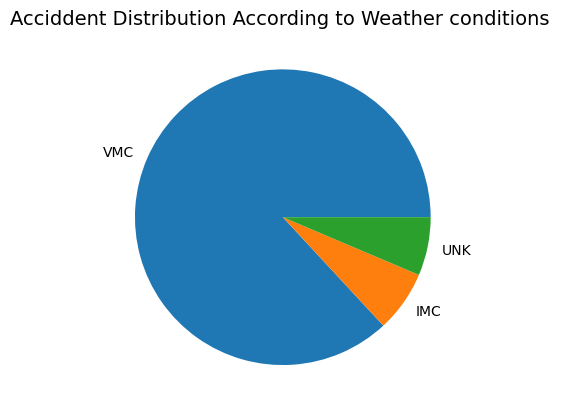

In [115]:
plt.pie(counts , labels= counts.index)
plt.title("Acciddent Distribution According to Weather conditions " , fontsize= 14)
plt.show()

##### Weather odnition analysis
###### There were Three weather conditions recorded 
 * VMC (Visual Meteorological Conditions)- Good Weather and nomuch obstructions 
 * IMc (Instrumental Meterological Conditions) - Bad Weather , pilots struggle under this conditions 
 * UNK (Unknown Weather conditions)

### WEATHER CONCLUSIONS

* Its safe to say that most accidents occured under good conditions where the pilots made all decisions



#### Visulaizing the data using the risk_by_aircraft table above

* PLOTTING A HORIZONTAL BAR GRAPH OF MODELS AND TOTAL INJURIES HAD 

In [116]:
import matplotlib.pyplot as plt 

In [117]:
risk_top = risk_by_aircraft.sort_values("Aircraft Model" , ascending=False).head(20) 
risk_top

,Aircraft Make,Aircraft Model,Accident_count,Injuries Per accident,Fatal Injuries,Serious Injuries,Minor Injuries,Uninjured
17349,Saber Trike,unk,1,2.0,0.0,1.0,1.0,0.0
8507,Evektor,sportstar,1,0.0,0.0,0.0,0.0,2.0
3783,Bely,lebed,1,2.0,2.0,0.0,0.0,0.0
8817,Falk,Zodiac HDS-601,1,1.0,0.0,1.0,0.0,0.0
20056,ZENITH,Zodiac CH601XL,1,1.0,1.0,0.0,0.0,0.0
9472,Gilbertson,Zodiac CH601HDS,1,0.0,0.0,0.0,0.0,1.0
20099,Zenair,Zodiac CH601,1,1.0,0.0,1.0,0.0,0.0
11271,Johnson,Zodiac CH601,1,0.0,0.0,0.0,0.0,1.0
10706,Hook,Zodiac CH-650,1,1.0,0.0,1.0,0.0,0.0
7567,Desimone,Zodiac CH-601-H,1,0.0,0.0,0.0,0.0,2.0


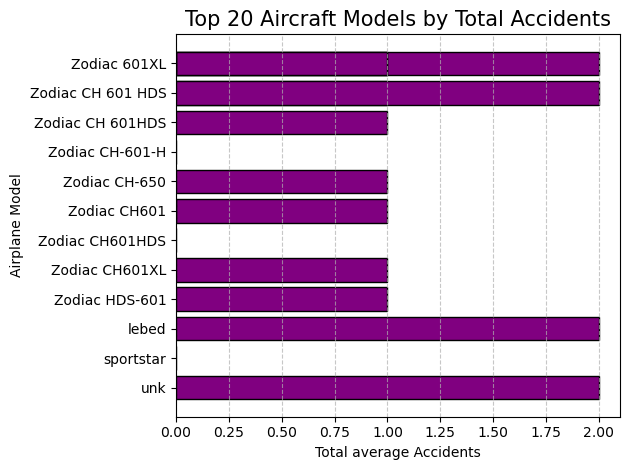

In [118]:
risk_top = risk_by_aircraft.sort_values("Aircraft Model" , ascending=False).head(20) 

total_injuries = risk_top[" Injuries Per accident" ]
aircraft_model = risk_top["Aircraft Model"]

plt.barh( aircraft_model ,total_injuries  , color='purple' , edgecolor = "black")
plt.title("Top 20 Aircraft Models by Total Accidents" , fontsize= 15)
plt.xlabel("Total average Accidents")
plt.ylabel("Airplane Model")

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

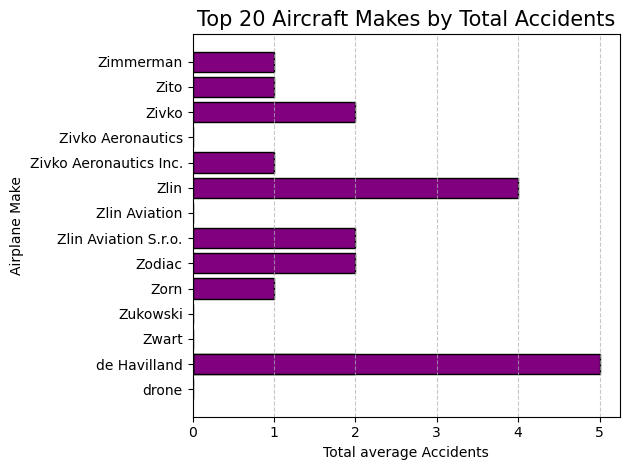

In [119]:
risk_top = risk_by_aircraft.sort_values("Aircraft Make" , ascending=False).head(20) 

total_injuries = risk_top[" Injuries Per accident" ]
aircraft_make = risk_top["Aircraft Make"]

plt.barh( aircraft_make ,total_injuries  , color='purple' , edgecolor = "black")
plt.title("Top 20 Aircraft Makes by Total Accidents" , fontsize= 15)
plt.xlabel("Total average Accidents")
plt.ylabel("Airplane Make")

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### USING A STACKED BAR CHART TO COMPARE INJURY TYPES WITH BOTH MAKES AND MODEL

In [120]:
risk_top = risk_by_aircraft.sort_values("Aircraft Make" , ascending=False).head(20) 
risk_top.columns

Index(['Aircraft Make', 'Aircraft Model', 'Accident_count',
       ' Injuries Per accident', ' Fatal Injuries', 'Serious Injuries',
       'Minor Injuries', 'Uninjured'],
      dtype='object')

##### STACKED BAR GRAPH OF TOP 20 AIRCRAFT MAKE with Fatal Injuries , Serious Injuries , Minor Injuries

In [121]:
risk_top = risk_by_aircraft.sort_values("Aircraft Make" , ascending=False).head(20) 

In [122]:
# CREATE  THE DF FOR AKES WITH INJURIES 

make_injuries = risk_top[["Aircraft Make" , ' Fatal Injuries' , 'Serious Injuries' , 'Minor Injuries']]
make_injuries

,Aircraft Make,Fatal Injuries,Serious Injuries,Minor Injuries
20134,drone,0.0,0.0,0.0
20133,de Havilland,0.0,1.0,1.0
20132,de Havilland,0.0,0.0,0.0
20131,de Havilland,0.0,0.0,0.0
20130,de Havilland,2.0,3.0,0.0
20129,de Havilland,0.0,0.0,0.0
20128,de Havilland,0.0,0.0,0.0
20127,Zwart,0.0,0.0,0.0
20126,Zukowski,0.0,0.0,0.0
20125,Zorn,1.0,0.0,0.0


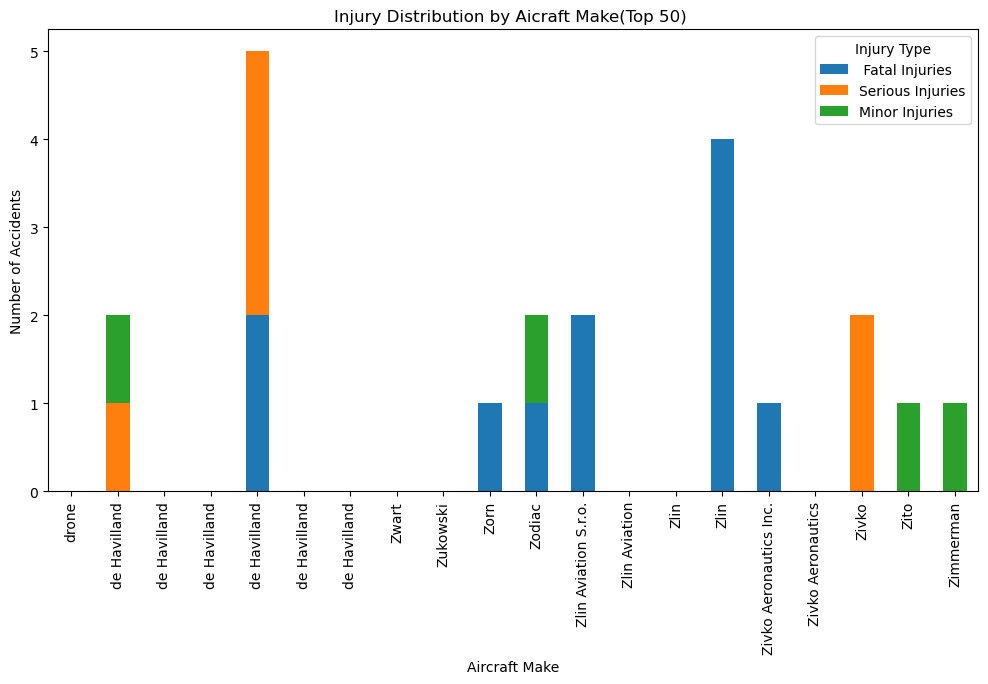

In [123]:
make_injuries.set_index("Aircraft Make" , inplace=True)
make_injuries.plot(kind="bar" , stacked=True , figsize=(12,6) )

plt.title("Injury Distribution by Aicraft Make(Top 50) ")
plt.ylabel("Number of Accidents")
plt.xlabel("Aircraft Make")
plt.legend(title = "Injury Type")
plt.show()


#### STACKED BAR GRAPH OF AIRCRAFT MODELS with  Fatal Injuries , Serious Injuries , Minor Injuries

In [124]:
# CREATE  THE DF FOR aircraft Models WITH INJURIES 

models_injuries = risk_top[["Aircraft Model" , ' Fatal Injuries' , 'Serious Injuries' , 'Minor Injuries']]
models_injuries

,Aircraft Model,Fatal Injuries,Serious Injuries,Minor Injuries
20134,Viper Pro,0.0,0.0,0.0
20133,DHC-8-202,0.0,1.0,1.0
20132,DHC-6-200,0.0,0.0,0.0
20131,DHC-3,0.0,0.0,0.0
20130,DHC-2 MK I,2.0,3.0,0.0
20129,DHC-2,0.0,0.0,0.0
20128,Beaver DHC-2 MK.1,0.0,0.0,0.0
20127,KIT FOX VIXEN,0.0,0.0,0.0
20126,EAA BIPLANE,0.0,0.0,0.0
20125,EAA Sport Bi-Plane,1.0,0.0,0.0


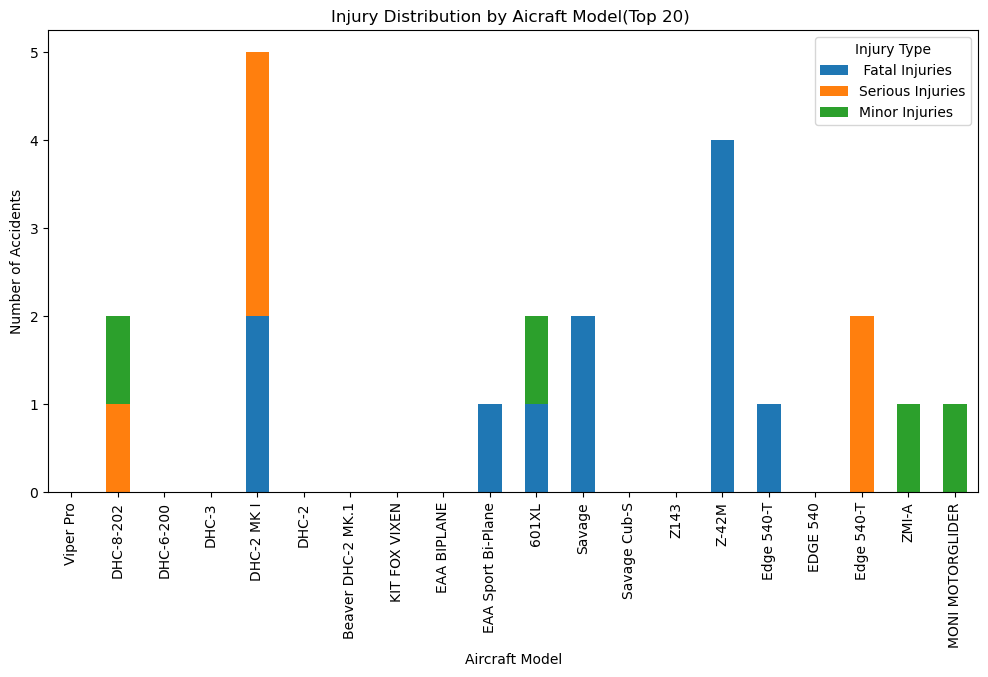

In [125]:
models_injuries.set_index("Aircraft Model", inplace=True)
models_injuries.plot(kind="bar" , stacked=True , figsize=(12,6) )

plt.title("Injury Distribution by Aicraft Model(Top 20) ")
plt.ylabel("Number of Accidents")
plt.xlabel("Aircraft Model")
plt.legend(title = "Injury Type")
plt.show()

### Weather condition , model , makes , injuries , engine , year visualization

##### First we create a new data frame with the accident number , no of engines , engine type , make , model  injuries categories , the weather condiion categories , the damage of the aircraft 

In [126]:
#check the data frane again

air_data =  aviation_data[["Accident.Number",'Make', 'Model' ,'Number.of.Engines', 'Engine.Type','Aircraft.damage', "Total_injuries_per_accident" , 'Total.Serious.Injuries' , "Total.Fatal.Injuries" , "Total.Minor.Injuries" ,"Total.Uninjured" , "Weather.Condition" ]]

###### drop all missing value , the rows will be inadmissible if used 

In [127]:
null_columns =["Accident.Number" , "Make",	"Model",	"Number.of.Engines" ,	"Engine.Type",	"Aircraft.damage"]
air_data.dropna(subset=null_columns, inplace=True)

C:\Users\compweb\AppData\Local\Temp\ipykernel_6072\1455938645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_data.dropna(subset=null_columns, inplace=True)


###### Remove also the unknown models and makes 

In [128]:
air_data =  air_data[(air_data["Make"] != "unknown") & (air_data["Model"] != "unknown")]

##### check for null values 

In [129]:
air_data.isna().sum()

Accident.Number                   0
Make                              0
Model                             0
Number.of.Engines                 0
Engine.Type                       0
Aircraft.damage                   0
Total_injuries_per_accident       0
Total.Serious.Injuries            0
Total.Fatal.Injuries              0
Total.Minor.Injuries              0
Total.Uninjured                4932
Weather.Condition                 0
dtype: int64

##### replace null values with appropropriate values

In [130]:
air_data["Total.Uninjured"].fillna(0 , inplace=True)

C:\Users\compweb\AppData\Local\Temp\ipykernel_6072\1474624842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_data["Total.Uninjured"].fillna(0 , inplace=True)


##### The dataset is now ready to be used 

In [131]:
air_data.isna().sum()

Accident.Number                0
Make                           0
Model                          0
Number.of.Engines              0
Engine.Type                    0
Aircraft.damage                0
Total_injuries_per_accident    0
Total.Serious.Injuries         0
Total.Fatal.Injuries           0
Total.Minor.Injuries           0
Total.Uninjured                0
Weather.Condition              0
dtype: int64

In [132]:
air_data

,Accident.Number,Make,Model,Number.of.Engines,Engine.Type,Aircraft.damage,Total_injuries_per_accident,Total.Serious.Injuries,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,SEA87LA080,Stinson,108-3,1.0,Reciprocating,Destroyed,2.0,0.0,2.0,0.0,0.0,UNK
1,LAX94LA336,Piper,PA24-180,1.0,Reciprocating,Destroyed,4.0,0.0,4.0,0.0,0.0,UNK
2,NYC07LA005,Cessna,172M,1.0,Reciprocating,Destroyed,3.0,0.0,3.0,0.0,0.0,IMC
3,LAX96LA321,Rockwell,112,1.0,Reciprocating,Destroyed,2.0,0.0,2.0,0.0,0.0,IMC
5,NYC79AA106,Mcdonnell Douglas,DC9,2.0,Turbo Fan,Substantial,1.0,0.0,0.0,1.0,44.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
90098,CEN23LA008,CESSNA,150,1.0,Reciprocating,Substantial,0.0,0.0,0.0,0.0,1.0,VMC
90106,ERA23LA014,CESSNA,177RG,1.0,Reciprocating,Substantial,0.0,0.0,0.0,0.0,2.0,VMC
90120,CEN23LA015,BEECH,B-60,2.0,Reciprocating,Substantial,0.0,0.0,0.0,0.0,1.0,VMC
90194,CEN23LA023,STEPHEN J HOFFMAN,MS-500,1.0,Reciprocating,Substantial,1.0,1.0,0.0,0.0,0.0,VMC


#### Create a new column called Aircraft type which will include the model , make and engine 
 * To be used for several comparisons 

In [136]:
air_data["Aircraft Type"] = air_data["Make"] + " | " + air_data["Model"] + " | " + air_data["Engine.Type"]

In [137]:
air_data["Aircraft Type"]

0                   Stinson | 108-3 | Reciprocating
1                  Piper | PA24-180 | Reciprocating
2                     Cessna | 172M | Reciprocating
3                    Rockwell | 112 | Reciprocating
5               Mcdonnell Douglas | DC9 | Turbo Fan
                            ...                    
90098                  CESSNA | 150 | Reciprocating
90106                CESSNA | 177RG | Reciprocating
90120                  BEECH | B-60 | Reciprocating
90194    STEPHEN J HOFFMAN | MS-500 | Reciprocating
90226                 LUSCOMBE | 8E | Reciprocating
Name: Aircraft Type, Length: 77953, dtype: object

In [138]:
air_data["Aircraft "] = air_data["Make"] + " | " + air_data["Model"]

In [142]:
air_data["Aircraft "].value_counts().head(30)

Aircraft 
Cessna | 152          2154
Cessna | 172          1229
Cessna | 172N          980
Piper | PA-28-140      801
Cessna | 150           708
Cessna | 172M          657
Cessna | 172P          589
Cessna | 150M          537
Piper | PA-18          534
Piper | PA-28-180      497
Piper | PA-28-161      491
Cessna | 180           487
Piper | PA-28-181      457
Cessna | 182           446
Piper | PA-38-112      435
Piper | PA-18-150      435
Cessna | 150L          404
Bell | 206B            398
CESSNA | 172           367
Grumman | G-164A       353
Cessna | 140           321
Piper | PA-32-300      320
Cessna | 170B          307
Piper | PA-24-250      304
Piper | PA-28R-200     289
Cessna | 182P          288
Beech | A36            282
Piper | PA-23-250      279
Cessna | A188B         277
Piper | PA-12          270
Name: count, dtype: int64

In [140]:
air_data

,Accident.Number,Make,Model,Number.of.Engines,Engine.Type,Aircraft.damage,Total_injuries_per_accident,Total.Serious.Injuries,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Aircraft Type,Aircraft
0,SEA87LA080,Stinson,108-3,1.0,Reciprocating,Destroyed,2.0,0.0,2.0,0.0,0.0,UNK,Stinson | 108-3 | Reciprocating,Stinson | 108-3
1,LAX94LA336,Piper,PA24-180,1.0,Reciprocating,Destroyed,4.0,0.0,4.0,0.0,0.0,UNK,Piper | PA24-180 | Reciprocating,Piper | PA24-180
2,NYC07LA005,Cessna,172M,1.0,Reciprocating,Destroyed,3.0,0.0,3.0,0.0,0.0,IMC,Cessna | 172M | Reciprocating,Cessna | 172M
3,LAX96LA321,Rockwell,112,1.0,Reciprocating,Destroyed,2.0,0.0,2.0,0.0,0.0,IMC,Rockwell | 112 | Reciprocating,Rockwell | 112
5,NYC79AA106,Mcdonnell Douglas,DC9,2.0,Turbo Fan,Substantial,1.0,0.0,0.0,1.0,44.0,VMC,Mcdonnell Douglas | DC9 | Turbo Fan,Mcdonnell Douglas | DC9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,CEN23LA008,CESSNA,150,1.0,Reciprocating,Substantial,0.0,0.0,0.0,0.0,1.0,VMC,CESSNA | 150 | Reciprocating,CESSNA | 150
90106,ERA23LA014,CESSNA,177RG,1.0,Reciprocating,Substantial,0.0,0.0,0.0,0.0,2.0,VMC,CESSNA | 177RG | Reciprocating,CESSNA | 177RG
90120,CEN23LA015,BEECH,B-60,2.0,Reciprocating,Substantial,0.0,0.0,0.0,0.0,1.0,VMC,BEECH | B-60 | Reciprocating,BEECH | B-60
90194,CEN23LA023,STEPHEN J HOFFMAN,MS-500,1.0,Reciprocating,Substantial,1.0,1.0,0.0,0.0,0.0,VMC,STEPHEN J HOFFMAN | MS-500 | Reciprocating,STEPHEN J HOFFMAN | MS-500


#### Accident Occurence with Aircraft model and make With type of Weather Condition

In [ ]:
weather_data = air_data[["Weather.Condition"]]

weather_data.value_counts()

Weather.Condition
VMC                  71218
IMC                   5412
UNK                   1323
Name: count, dtype: int64

In [ ]:
air_data["Aircraft.damage"].value_counts()

Aircraft.damage
Substantial    59325
Destroyed      16545
Minor           2077
Unknown            6
Name: count, dtype: int64

In [ ]:
air_data[["Model" , "Make", "Engine.Type" , "Total.Uninjured"]].value_counts().head(25)

Model      Make     Total.Uninjured
152        Cessna   1.0                1123
                    0.0                 538
                    2.0                 454
172        Cessna   1.0                 429
PA-28-140  Piper    0.0                 386
172N       Cessna   1.0                 334
                    0.0                 325
172        Cessna   0.0                 313
150        Cessna   1.0                 288
172        Cessna   2.0                 278
G-164A     Grumman  1.0                 262
PA-28-180  Piper    0.0                 237
150        Cessna   0.0                 233
150M       Cessna   1.0                 229
172M       Cessna   0.0                 227
PA-18      Piper    1.0                 221
172P       Cessna   1.0                 211
PA-28-140  Piper    1.0                 203
PA-28-181  Piper    0.0                 197
172N       Cessna   2.0                 197
172P       Cessna   0.0                 197
172M       Cessna   1.0                 